# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [27]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [28]:
# Convert 'total_amount' to numeric after removing '$'
df['total_amount'] = df['total_amount'].replace('[\$,]', '', regex=True).astype(float)

In [29]:
# Remove rows with any NULL/empty values
df.dropna(inplace=True)

In [30]:
print(df)

      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

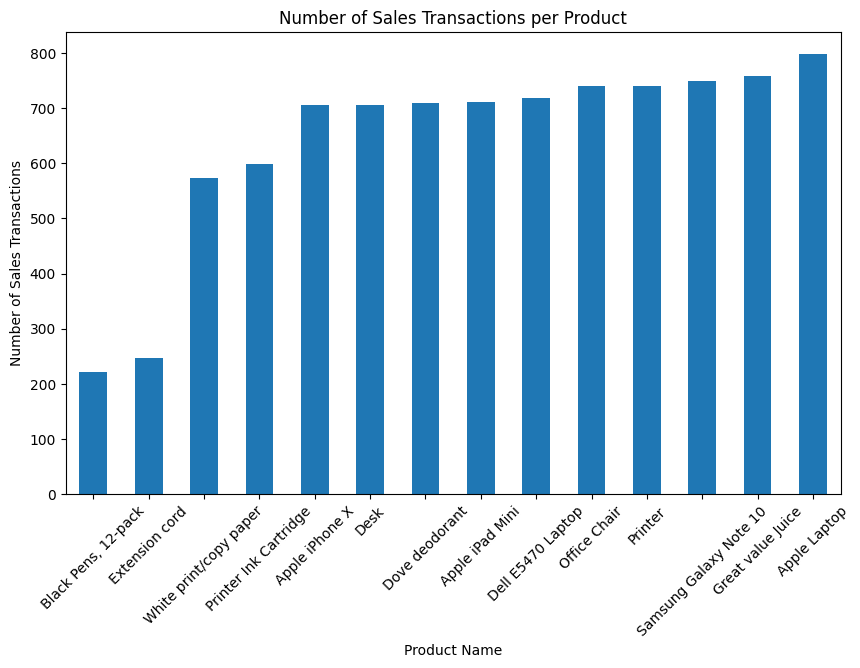

In [31]:
#bar chart
# Count the number of sales (transactions) per product
sales_count_per_product = df['product_name'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
sales_count_per_product.plot(kind='bar')
plt.title('Number of Sales Transactions per Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Sales Transactions')
plt.xticks(rotation=45)
plt.show()

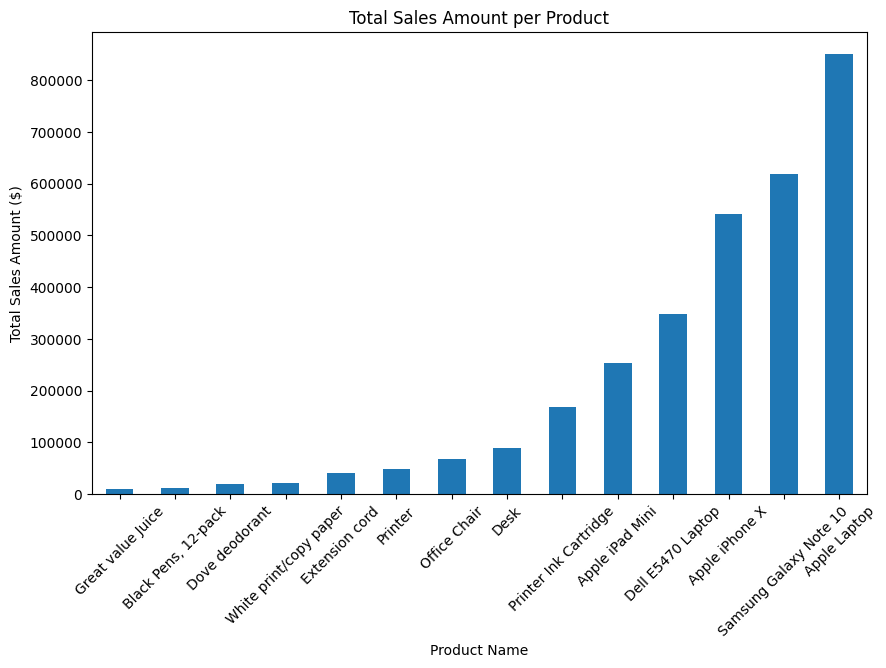

In [32]:
#bar chart 2
product_totals = df.groupby('product_name')['total_amount'].sum().sort_values()

plt.figure(figsize=(10, 6))
product_totals.plot(kind='bar')
plt.title('Total Sales Amount per Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()

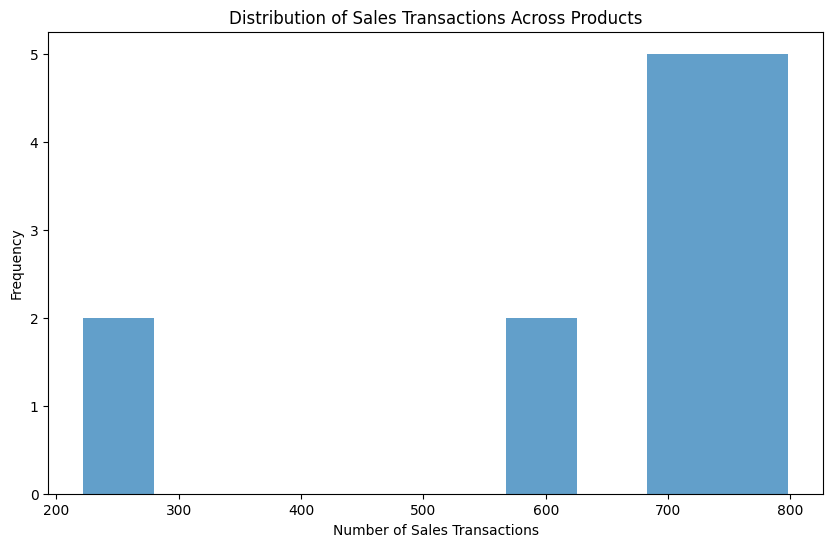

In [33]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['product_name'].value_counts(), bins=10, alpha=0.7)
plt.title('Distribution of Sales Transactions Across Products')
plt.xlabel('Number of Sales Transactions')
plt.ylabel('Frequency')
plt.show()

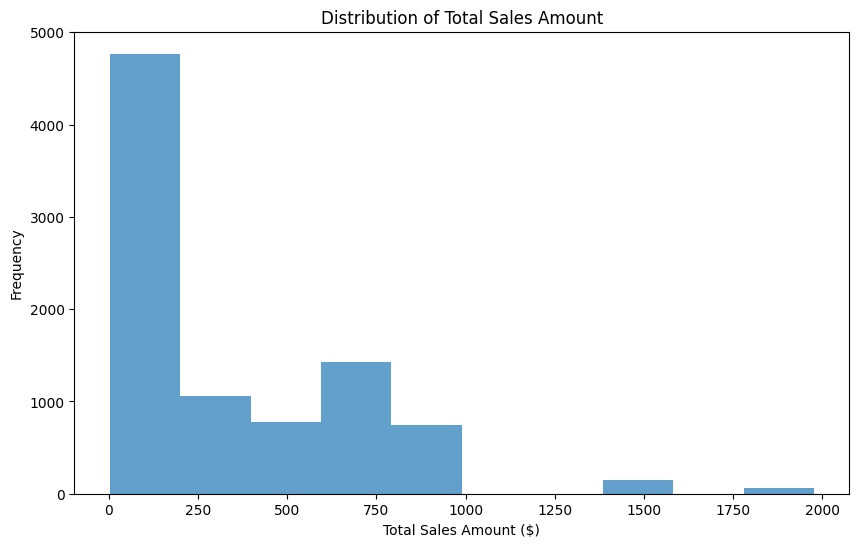

In [34]:
#histogram 2
plt.figure(figsize=(10, 6))
plt.hist(df['total_amount'], bins=10, alpha=0.7)
plt.title('Distribution of Total Sales Amount')
plt.xlabel('Total Sales Amount ($)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

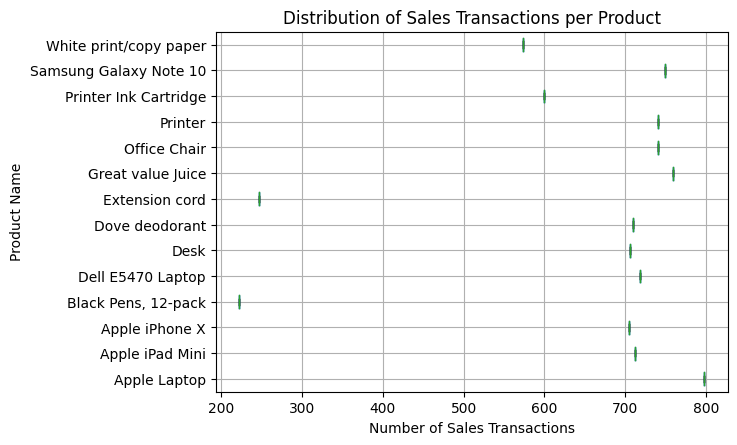

In [35]:
#box plot
# Create a new DataFrame for sales count per product
sales_per_product_df = df.groupby('product_name').size().reset_index(name='sales_count')

plt.figure(figsize=(10, 6))
sales_per_product_df.boxplot(column='sales_count', by='product_name', vert=False)
plt.title('Distribution of Sales Transactions per Product')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Number of Sales Transactions')
plt.ylabel('Product Name')
plt.show()

<Figure size 1000x600 with 0 Axes>

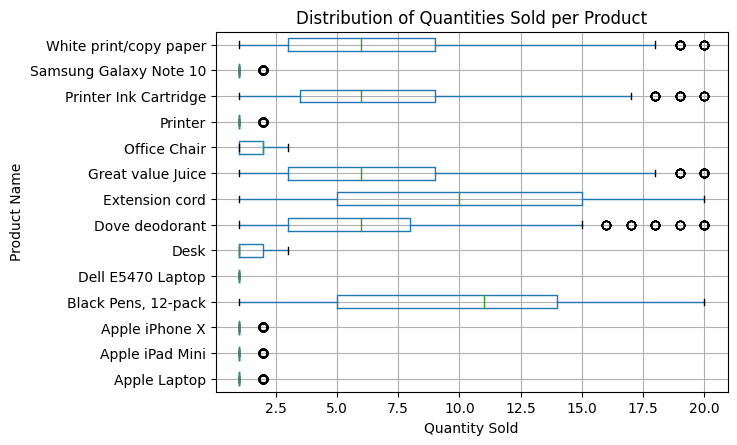

In [36]:
#box plot 2
plt.figure(figsize=(10, 6))
df.boxplot(column='quantity', by='product_name', vert=False)
plt.title('Distribution of Quantities Sold per Product')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

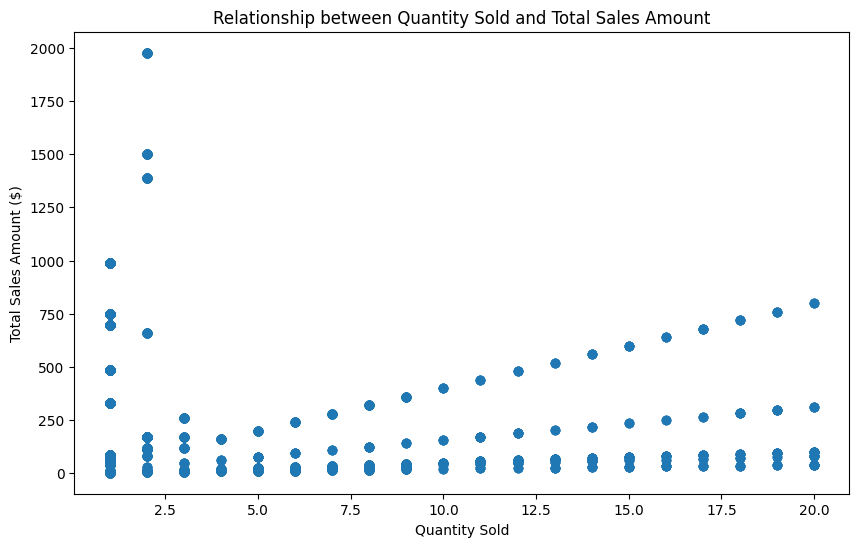

In [37]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['quantity'], df['total_amount'], alpha=0.5)
plt.title('Relationship between Quantity Sold and Total Sales Amount')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales Amount ($)')
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

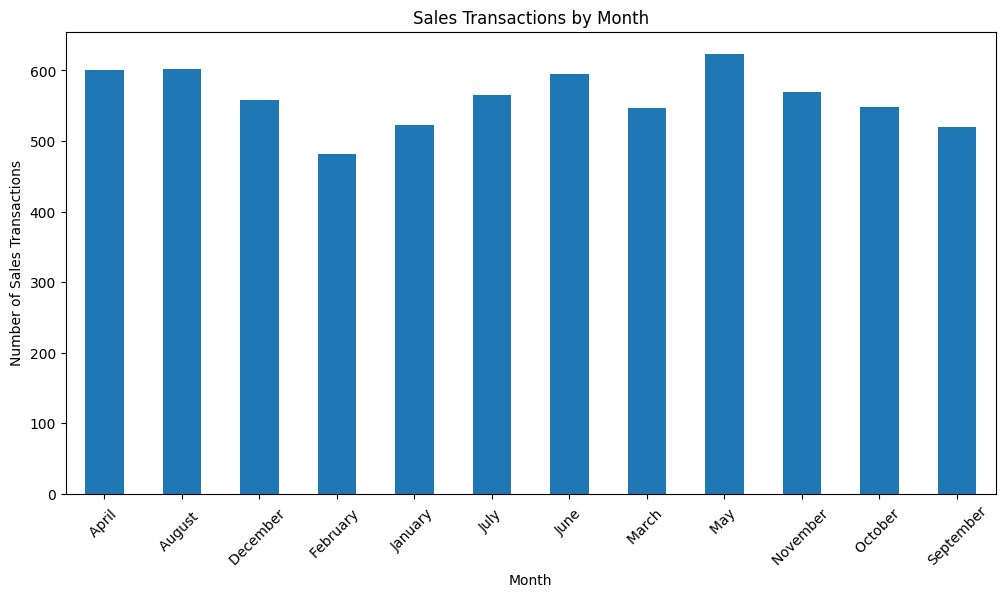

In [38]:
#month of year
# How does the month of year affect sales?
monthly_sales = df.groupby('order_month')['order_id'].nunique()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Sales Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales Transactions')
plt.xticks(rotation=45)
plt.show()

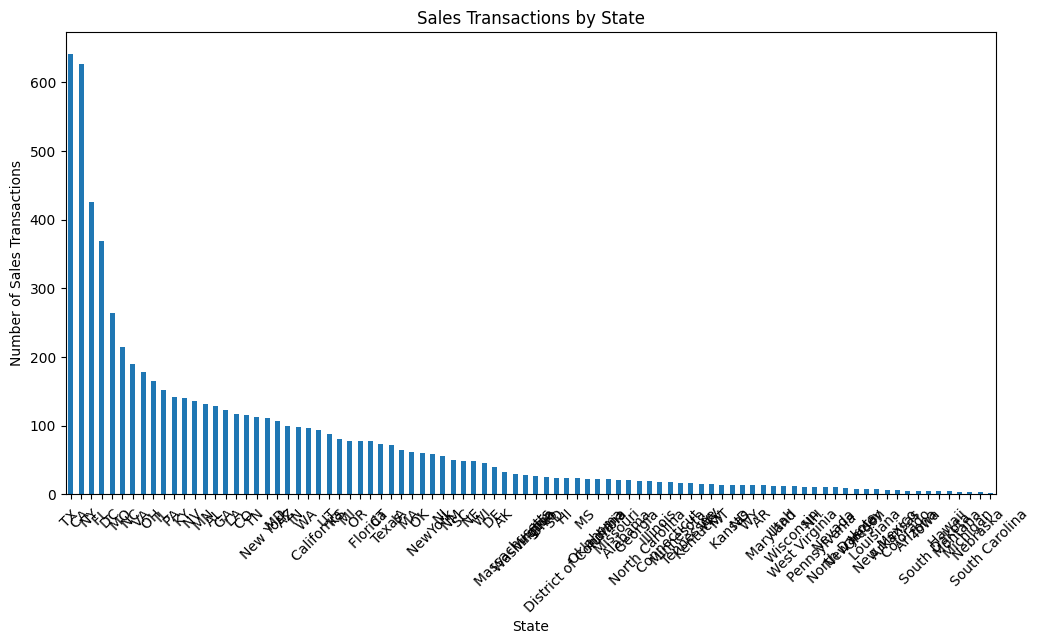

In [39]:
#sales by state
# What are the best states for sales?
sales_by_state = df.groupby('state_province')['order_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar')
plt.title('Sales Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Sales Transactions')
plt.xticks(rotation=45)
plt.show()

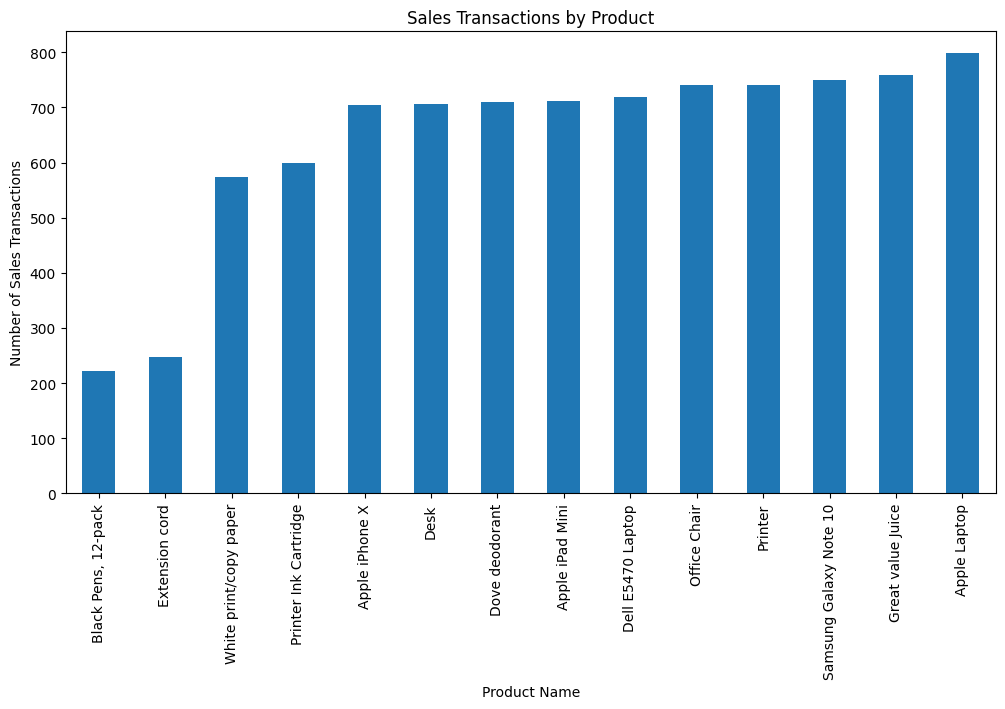

In [40]:
#sales by product
# What are the best and worst products for sales?
sales_by_product = df.groupby('product_name')['order_id'].nunique().sort_values()
plt.figure(figsize=(12, 6))
sales_by_product.plot(kind='bar')
plt.title('Sales Transactions by Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Sales Transactions')
plt.xticks(rotation=90)
plt.show()

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

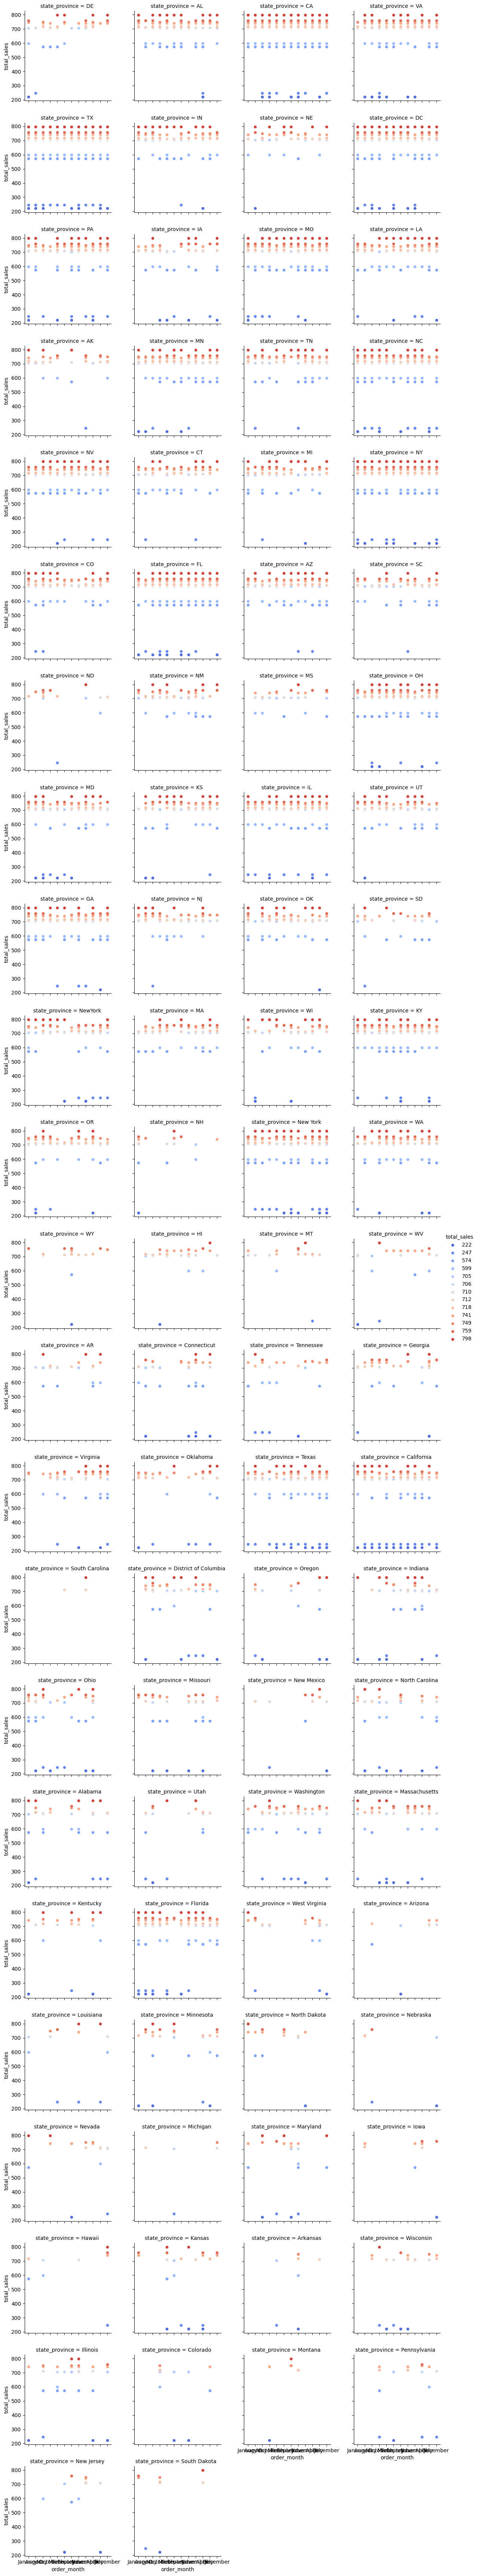

In [41]:
#pair plot

#It may take 2 min to run but its worth it trust me

# First, ensure that 'total_sales' is computed correctly
if 'total_sales' not in df.columns:
    df['total_sales'] = df.groupby('product_name')['order_id'].transform('count')

# Now, create the FacetGrid using the correct column names
g = sns.FacetGrid(df, col='state_province', hue='total_sales', palette='coolwarm', col_wrap=4, height=3)
g.map(sns.scatterplot, 'order_month', 'total_sales')  # Ensure 'total_sales' is used here instead of 'sales_amount'

g.add_legend()
plt.show()